In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import pulp

import sys
sys.path.insert(0, '../../..')
import leximin_assignment
import bottleneck_assignment
import assignment

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

import warnings

In [2]:
df = pd.read_csv('../../../data/data.csv', index_col=0)
types = ['ES', 'TH', 'RRH', 'PREV']
df = df[df['Real'] != 2]
df = df.drop(labels='PSH', axis=1)

df.shape

(13940, 7)

In [3]:
df.head()

,HouseholdID,Real,Reentered,ES,TH,RRH,PREV
6,200001080,1,1,0.781217,0.764820,0.754706,0.704289
7,200001139,5,1,0.570296,0.618977,0.634829,0.541514
8,200001156,5,0,0.274172,0.227518,0.225883,0.162229
9,200001169,5,1,0.589506,0.600307,0.599340,0.509780
10,200001171,5,1,0.638970,0.555111,0.585469,0.506257


In [4]:
capacity_df = df['Real'].value_counts()
capacity_df

5    6202
1    4441
3    2451
4     846
Name: Real, dtype: int64

In [5]:
increase_from_best_df = df.copy()
increase_from_best_df['Best'] = increase_from_best_df[types].min(axis=1)
for type_ in types:
    increase_from_best_df[type_] = df[type_] - increase_from_best_df['Best']
    
cost_matrix = df[types].to_numpy()
cost_matrix = (cost_matrix * 10 ** 9).round(0).astype(int)
increase_matrix = (increase_from_best_df[types].to_numpy() * 10 ** 9).round(0).astype(int)
capacities = capacity_df.sort_index().to_numpy()

print(cost_matrix.shape)
cost_matrix

(13940, 4)


array([[781217497, 764820278, 754705525, 704289144],
       [570296480, 618977105, 634828849, 541513653],
       [274172124, 227518497, 225882721, 162229324],
       ...,
       [547168618, 464714899, 519331945, 406558559],
       [462085596, 410795089, 437190352, 311884340],
       [198679886, 147321500, 167755823, 103371890]])

In [6]:
print(increase_matrix.shape)
increase_matrix

(13940, 4)


array([[ 76928353,  60531134,  50416381,         0],
       [ 28782827,  77463452,  93315196,         0],
       [111942800,  65289173,  63653397,         0],
       ...,
       [140610059,  58156340, 112773386,         0],
       [150201256,  98910749, 125306012,         0],
       [ 95307996,  43949610,  64383933,         0]])

# Leximin

In [7]:
# Leximin assignment
leximin_assigner = leximin_assignment.LeximinAssignmentHelperV4(
    increase_matrix, capacities)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    leximin_assignments = leximin_assigner.solve(verbose=True)

Running from the beginning...
Number of agents assigned: 0 / 13940
Current leximin: 220759901
Number of agents assigned: 1 / 13940
Current leximin: 75035181
Number of agents assigned: 2 / 13940
Current leximin: 75033994
Number of agents assigned: 3 / 13940
Current leximin: 75028873
Number of agents assigned: 4 / 13940
Current leximin: 75024648
Number of agents assigned: 5 / 13940
Current leximin: 75020858
Number of agents assigned: 6 / 13940
Current leximin: 75013831
Number of agents assigned: 7 / 13940
Current leximin: 75012762
Number of agents assigned: 8 / 13940
Current leximin: 75009023
Number of agents assigned: 9 / 13940
Current leximin: 75002030
Number of agents assigned: 10 / 13940
Current leximin: 74998653
Number of agents assigned: 11 / 13940
Current leximin: 74994351
Number of agents assigned: 12 / 13940
Current leximin: 74988100
Number of agents assigned: 13 / 13940
Current leximin: 74986836
Number of agents assigned: 14 / 13940
Current leximin: 74985758
Number of agents as

Number of agents assigned: 128 / 13940
Current leximin: 74398738
Number of agents assigned: 129 / 13940
Current leximin: 74398052
Number of agents assigned: 130 / 13940
Current leximin: 74387218
Number of agents assigned: 131 / 13940
Current leximin: 74384426
Number of agents assigned: 132 / 13940
Current leximin: 74374754
Number of agents assigned: 133 / 13940
Current leximin: 74351330
Number of agents assigned: 134 / 13940
Current leximin: 74344079
Number of agents assigned: 135 / 13940
Current leximin: 74341604
Number of agents assigned: 136 / 13940
Current leximin: 74339169
Number of agents assigned: 137 / 13940
Current leximin: 74334167
Number of agents assigned: 138 / 13940
Current leximin: 74330756
Number of agents assigned: 139 / 13940
Current leximin: 74327498
Number of agents assigned: 140 / 13940
Current leximin: 74323573
Number of agents assigned: 141 / 13940
Current leximin: 74319132
Number of agents assigned: 142 / 13940
Current leximin: 74313106
Number of agents assigned

Number of agents assigned: 255 / 13940
Current leximin: 73654708
Number of agents assigned: 256 / 13940
Current leximin: 73653311
Number of agents assigned: 257 / 13940
Current leximin: 73636889
Number of agents assigned: 258 / 13940
Current leximin: 73626712
Number of agents assigned: 259 / 13940
Current leximin: 73623166
Number of agents assigned: 260 / 13940
Current leximin: 73622009
Number of agents assigned: 261 / 13940
Current leximin: 73616925
Number of agents assigned: 262 / 13940
Current leximin: 73610117
Number of agents assigned: 263 / 13940
Current leximin: 73598159
Number of agents assigned: 264 / 13940
Current leximin: 73590504
Number of agents assigned: 265 / 13940
Current leximin: 73589517
Number of agents assigned: 266 / 13940
Current leximin: 73570479
Number of agents assigned: 267 / 13940
Current leximin: 73566309
Number of agents assigned: 268 / 13940
Current leximin: 73556941
Number of agents assigned: 269 / 13940
Current leximin: 73556055
Number of agents assigned

Number of agents assigned: 382 / 13940
Current leximin: 72807218
Number of agents assigned: 383 / 13940
Current leximin: 72792874
Number of agents assigned: 384 / 13940
Current leximin: 72789458
Number of agents assigned: 385 / 13940
Current leximin: 72789124
Number of agents assigned: 386 / 13940
Current leximin: 72782632
Number of agents assigned: 387 / 13940
Current leximin: 72765108
Number of agents assigned: 388 / 13940
Current leximin: 72758519
Number of agents assigned: 389 / 13940
Current leximin: 72753994
Number of agents assigned: 390 / 13940
Current leximin: 72744738
Number of agents assigned: 391 / 13940
Current leximin: 72741235
Number of agents assigned: 392 / 13940
Current leximin: 72729984
Number of agents assigned: 393 / 13940
Current leximin: 72726937
Number of agents assigned: 394 / 13940
Current leximin: 72726649
Number of agents assigned: 395 / 13940
Current leximin: 72718585
Number of agents assigned: 396 / 13940
Current leximin: 72717764
Number of agents assigned

Number of agents assigned: 509 / 13940
Current leximin: 72019120
Number of agents assigned: 510 / 13940
Current leximin: 72006565
Number of agents assigned: 511 / 13940
Current leximin: 71998075
Number of agents assigned: 512 / 13940
Current leximin: 71988268
Number of agents assigned: 513 / 13940
Current leximin: 71976797
Number of agents assigned: 514 / 13940
Current leximin: 71973526
Number of agents assigned: 515 / 13940
Current leximin: 71968221
Number of agents assigned: 516 / 13940
Current leximin: 71965156
Number of agents assigned: 517 / 13940
Current leximin: 71964991
Number of agents assigned: 518 / 13940
Current leximin: 71958648
Number of agents assigned: 519 / 13940
Current leximin: 71944128
Number of agents assigned: 520 / 13940
Current leximin: 71941138
Number of agents assigned: 521 / 13940
Current leximin: 71939406
Number of agents assigned: 522 / 13940
Current leximin: 71938681
Number of agents assigned: 523 / 13940
Current leximin: 71936148
Number of agents assigned

Number of agents assigned: 636 / 13940
Current leximin: 71408437
Number of agents assigned: 637 / 13940
Current leximin: 71407865
Number of agents assigned: 638 / 13940
Current leximin: 71403734
Number of agents assigned: 639 / 13940
Current leximin: 71398943
Number of agents assigned: 640 / 13940
Current leximin: 71397986
Number of agents assigned: 641 / 13940
Current leximin: 71396209
Number of agents assigned: 642 / 13940
Current leximin: 71390302
Number of agents assigned: 643 / 13940
Current leximin: 71389651
Number of agents assigned: 644 / 13940
Current leximin: 71389384
Number of agents assigned: 645 / 13940
Current leximin: 71388478
Number of agents assigned: 646 / 13940
Current leximin: 71385193
Number of agents assigned: 647 / 13940
Current leximin: 71377772
Number of agents assigned: 648 / 13940
Current leximin: 71377256
Number of agents assigned: 649 / 13940
Current leximin: 71374559
Number of agents assigned: 650 / 13940
Current leximin: 71370422
Number of agents assigned

Number of agents assigned: 763 / 13940
Current leximin: 70806268
Number of agents assigned: 764 / 13940
Current leximin: 70792126
Number of agents assigned: 765 / 13940
Current leximin: 70789384
Number of agents assigned: 766 / 13940
Current leximin: 70784036
Number of agents assigned: 767 / 13940
Current leximin: 70782663
Number of agents assigned: 768 / 13940
Current leximin: 70782298
Number of agents assigned: 769 / 13940
Current leximin: 70781758
Number of agents assigned: 770 / 13940
Current leximin: 70778979
Number of agents assigned: 771 / 13940
Current leximin: 70772216
Number of agents assigned: 772 / 13940
Current leximin: 70769664
Number of agents assigned: 773 / 13940
Current leximin: 70767313
Number of agents assigned: 774 / 13940
Current leximin: 70754110
Number of agents assigned: 775 / 13940
Current leximin: 70752922
Number of agents assigned: 776 / 13940
Current leximin: 70747230
Number of agents assigned: 777 / 13940
Current leximin: 70740813
Number of agents assigned

Number of agents assigned: 890 / 13940
Current leximin: 70023573
Number of agents assigned: 891 / 13940
Current leximin: 70023337
Number of agents assigned: 892 / 13940
Current leximin: 70020333
Number of agents assigned: 893 / 13940
Current leximin: 70008581
Number of agents assigned: 894 / 13940
Current leximin: 69997894
Number of agents assigned: 895 / 13940
Current leximin: 69993500
Number of agents assigned: 896 / 13940
Current leximin: 69992657
Number of agents assigned: 897 / 13940
Current leximin: 69990003
Number of agents assigned: 898 / 13940
Current leximin: 69986874
Number of agents assigned: 899 / 13940
Current leximin: 69983898
Number of agents assigned: 900 / 13940
Current leximin: 69980804
Number of agents assigned: 901 / 13940
Current leximin: 69980349
Number of agents assigned: 902 / 13940
Current leximin: 69976306
Number of agents assigned: 903 / 13940
Current leximin: 69964703
Number of agents assigned: 904 / 13940
Current leximin: 69959379
Number of agents assigned

Number of agents assigned: 1016 / 13940
Current leximin: 69380121
Number of agents assigned: 1017 / 13940
Current leximin: 69379015
Number of agents assigned: 1018 / 13940
Current leximin: 69377543
Number of agents assigned: 1019 / 13940
Current leximin: 69370880
Number of agents assigned: 1020 / 13940
Current leximin: 69370508
Number of agents assigned: 1021 / 13940
Current leximin: 69363199
Number of agents assigned: 1022 / 13940
Current leximin: 69335538
Number of agents assigned: 1023 / 13940
Current leximin: 69333788
Number of agents assigned: 1024 / 13940
Current leximin: 69330505
Number of agents assigned: 1025 / 13940
Current leximin: 69325298
Number of agents assigned: 1026 / 13940
Current leximin: 69323998
Number of agents assigned: 1027 / 13940
Current leximin: 69312130
Number of agents assigned: 1028 / 13940
Current leximin: 69308121
Number of agents assigned: 1029 / 13940
Current leximin: 69307930
Number of agents assigned: 1030 / 13940
Current leximin: 69307005
Number of 

Number of agents assigned: 1141 / 13940
Current leximin: 68660366
Number of agents assigned: 1142 / 13940
Current leximin: 68652356
Number of agents assigned: 1143 / 13940
Current leximin: 68651767
Number of agents assigned: 1144 / 13940
Current leximin: 68649849
Number of agents assigned: 1145 / 13940
Current leximin: 68642313
Number of agents assigned: 1146 / 13940
Current leximin: 68638231
Number of agents assigned: 1147 / 13940
Current leximin: 68634468
Number of agents assigned: 1148 / 13940
Current leximin: 68633281
Number of agents assigned: 1149 / 13940
Current leximin: 68629761
Number of agents assigned: 1150 / 13940
Current leximin: 68625013
Number of agents assigned: 1151 / 13940
Current leximin: 68624403
Number of agents assigned: 1152 / 13940
Current leximin: 68614744
Number of agents assigned: 1153 / 13940
Current leximin: 68610266
Number of agents assigned: 1154 / 13940
Current leximin: 68600876
Number of agents assigned: 1155 / 13940
Current leximin: 68591780
Number of 

Number of agents assigned: 1266 / 13940
Current leximin: 68015773
Number of agents assigned: 1267 / 13940
Current leximin: 68006215
Number of agents assigned: 1268 / 13940
Current leximin: 67994199
Number of agents assigned: 1269 / 13940
Current leximin: 67976496
Number of agents assigned: 1270 / 13940
Current leximin: 67974346
Number of agents assigned: 1271 / 13940
Current leximin: 67964970
Number of agents assigned: 1272 / 13940
Current leximin: 67963541
Number of agents assigned: 1273 / 13940
Current leximin: 67955511
Number of agents assigned: 1274 / 13940
Current leximin: 67948145
Number of agents assigned: 1275 / 13940
Current leximin: 67946959
Number of agents assigned: 1276 / 13940
Current leximin: 67924234
Number of agents assigned: 1277 / 13940
Current leximin: 67922825
Number of agents assigned: 1278 / 13940
Current leximin: 67915914
Number of agents assigned: 1279 / 13940
Current leximin: 67908261
Number of agents assigned: 1280 / 13940
Current leximin: 67904985
Number of 

Number of agents assigned: 1391 / 13940
Current leximin: 67204247
Number of agents assigned: 1392 / 13940
Current leximin: 67199433
Number of agents assigned: 1393 / 13940
Current leximin: 67192149
Number of agents assigned: 1394 / 13940
Current leximin: 67188988
Number of agents assigned: 1395 / 13940
Current leximin: 67179612
Number of agents assigned: 1396 / 13940
Current leximin: 67176384
Number of agents assigned: 1397 / 13940
Current leximin: 67173062
Number of agents assigned: 1398 / 13940
Current leximin: 67171699
Number of agents assigned: 1399 / 13940
Current leximin: 67170679
Number of agents assigned: 1400 / 13940
Current leximin: 67166254
Number of agents assigned: 1401 / 13940
Current leximin: 67159085
Number of agents assigned: 1402 / 13940
Current leximin: 67153160
Number of agents assigned: 1403 / 13940
Current leximin: 67151415
Number of agents assigned: 1404 / 13940
Current leximin: 67149638
Number of agents assigned: 1405 / 13940
Current leximin: 67147579
Number of 

Number of agents assigned: 1516 / 13940
Current leximin: 66353778
Number of agents assigned: 1517 / 13940
Current leximin: 66349693
Number of agents assigned: 1518 / 13940
Current leximin: 66331208
Number of agents assigned: 1519 / 13940
Current leximin: 66329844
Number of agents assigned: 1520 / 13940
Current leximin: 66325004
Number of agents assigned: 1521 / 13940
Current leximin: 66323095
Number of agents assigned: 1522 / 13940
Current leximin: 66320580
Number of agents assigned: 1523 / 13940
Current leximin: 66318691
Number of agents assigned: 1524 / 13940
Current leximin: 66308041
Number of agents assigned: 1525 / 13940
Current leximin: 66298510
Number of agents assigned: 1526 / 13940
Current leximin: 66298194
Number of agents assigned: 1527 / 13940
Current leximin: 66265905
Number of agents assigned: 1528 / 13940
Current leximin: 66264038
Number of agents assigned: 1529 / 13940
Current leximin: 66261765
Number of agents assigned: 1530 / 13940
Current leximin: 66255281
Number of 

Number of agents assigned: 1640 / 13940
Current leximin: 65556725
Number of agents assigned: 1641 / 13940
Current leximin: 65547106
Number of agents assigned: 1642 / 13940
Current leximin: 65543361
Number of agents assigned: 1643 / 13940
Current leximin: 65540875
Number of agents assigned: 1644 / 13940
Current leximin: 65535648
Number of agents assigned: 1645 / 13940
Current leximin: 65531430
Number of agents assigned: 1646 / 13940
Current leximin: 65530874
Number of agents assigned: 1647 / 13940
Current leximin: 65526178
Number of agents assigned: 1648 / 13940
Current leximin: 65515009
Number of agents assigned: 1649 / 13940
Current leximin: 65514666
Reusing current leximin
Number of agents assigned: 1650 / 13940
Current leximin: 65514666
Reusing current leximin
Number of agents assigned: 1651 / 13940
Current leximin: 65514666
Reusing current leximin
Number of agents assigned: 1652 / 13940
Current leximin: 65514666
Number of agents assigned: 1653 / 13940
Current leximin: 65514556
Numb

Number of agents assigned: 1763 / 13940
Current leximin: 64876744
Number of agents assigned: 1764 / 13940
Current leximin: 64870706
Number of agents assigned: 1765 / 13940
Current leximin: 64869564
Number of agents assigned: 1766 / 13940
Current leximin: 64864507
Number of agents assigned: 1767 / 13940
Current leximin: 64862735
Number of agents assigned: 1768 / 13940
Current leximin: 64854538
Number of agents assigned: 1769 / 13940
Current leximin: 64853407
Number of agents assigned: 1770 / 13940
Current leximin: 64848240
Number of agents assigned: 1771 / 13940
Current leximin: 64842998
Number of agents assigned: 1772 / 13940
Current leximin: 64833210
Number of agents assigned: 1773 / 13940
Current leximin: 64825509
Number of agents assigned: 1774 / 13940
Current leximin: 64820695
Number of agents assigned: 1775 / 13940
Current leximin: 64819918
Number of agents assigned: 1776 / 13940
Current leximin: 64811678
Number of agents assigned: 1777 / 13940
Current leximin: 64811309
Number of 

Number of agents assigned: 1888 / 13940
Current leximin: 64081920
Number of agents assigned: 1889 / 13940
Current leximin: 64078477
Number of agents assigned: 1890 / 13940
Current leximin: 64072942
Number of agents assigned: 1891 / 13940
Current leximin: 64072218
Number of agents assigned: 1892 / 13940
Current leximin: 64071385
Number of agents assigned: 1893 / 13940
Current leximin: 64070555
Number of agents assigned: 1894 / 13940
Current leximin: 64065469
Number of agents assigned: 1895 / 13940
Current leximin: 64060602
Number of agents assigned: 1896 / 13940
Current leximin: 64050818
Number of agents assigned: 1897 / 13940
Current leximin: 64046169
Number of agents assigned: 1898 / 13940
Current leximin: 64045231
Number of agents assigned: 1899 / 13940
Current leximin: 64043567
Number of agents assigned: 1900 / 13940
Current leximin: 64035082
Number of agents assigned: 1901 / 13940
Current leximin: 64029489
Number of agents assigned: 1902 / 13940
Current leximin: 64016221
Number of 

Number of agents assigned: 2013 / 13940
Current leximin: 63319933
Reusing current leximin
Number of agents assigned: 2014 / 13940
Current leximin: 63319933
Reusing current leximin
Number of agents assigned: 2015 / 13940
Current leximin: 63319933
Number of agents assigned: 2016 / 13940
Current leximin: 63319768
Number of agents assigned: 2017 / 13940
Current leximin: 63314822
Number of agents assigned: 2018 / 13940
Current leximin: 63306264
Number of agents assigned: 2019 / 13940
Current leximin: 63304076
Number of agents assigned: 2020 / 13940
Current leximin: 63301856
Number of agents assigned: 2021 / 13940
Current leximin: 63291856
Number of agents assigned: 2022 / 13940
Current leximin: 63289437
Number of agents assigned: 2023 / 13940
Current leximin: 63285146
Number of agents assigned: 2024 / 13940
Current leximin: 63267167
Number of agents assigned: 2025 / 13940
Current leximin: 63264707
Number of agents assigned: 2026 / 13940
Current leximin: 63259489
Number of agents assigned: 2

Number of agents assigned: 2137 / 13940
Current leximin: 62554813
Number of agents assigned: 2138 / 13940
Current leximin: 62552362
Number of agents assigned: 2139 / 13940
Current leximin: 62550721
Number of agents assigned: 2140 / 13940
Current leximin: 62545606
Number of agents assigned: 2141 / 13940
Current leximin: 62545084
Number of agents assigned: 2142 / 13940
Current leximin: 62541576
Number of agents assigned: 2143 / 13940
Current leximin: 62527130
Number of agents assigned: 2144 / 13940
Current leximin: 62526625
Number of agents assigned: 2145 / 13940
Current leximin: 62524090
Number of agents assigned: 2146 / 13940
Current leximin: 62499475
Number of agents assigned: 2147 / 13940
Current leximin: 62497069
Number of agents assigned: 2148 / 13940
Current leximin: 62493230
Number of agents assigned: 2149 / 13940
Current leximin: 62486571
Number of agents assigned: 2150 / 13940
Current leximin: 62480425
Number of agents assigned: 2151 / 13940
Current leximin: 62475062
Number of 

Number of agents assigned: 2262 / 13940
Current leximin: 61812706
Number of agents assigned: 2263 / 13940
Current leximin: 61810190
Number of agents assigned: 2264 / 13940
Current leximin: 61808103
Number of agents assigned: 2265 / 13940
Current leximin: 61797618
Number of agents assigned: 2266 / 13940
Current leximin: 61796071
Number of agents assigned: 2267 / 13940
Current leximin: 61789373
Number of agents assigned: 2268 / 13940
Current leximin: 61785726
Number of agents assigned: 2269 / 13940
Current leximin: 61749452
Number of agents assigned: 2270 / 13940
Current leximin: 61749315
Number of agents assigned: 2271 / 13940
Current leximin: 61732421
Number of agents assigned: 2272 / 13940
Current leximin: 61719134
Number of agents assigned: 2273 / 13940
Current leximin: 61712527
Number of agents assigned: 2274 / 13940
Current leximin: 61712398
Number of agents assigned: 2275 / 13940
Current leximin: 61707088
Number of agents assigned: 2276 / 13940
Current leximin: 61704434
Number of 

Number of agents assigned: 2387 / 13940
Current leximin: 60974323
Number of agents assigned: 2388 / 13940
Current leximin: 60969201
Number of agents assigned: 2389 / 13940
Current leximin: 60958466
Number of agents assigned: 2390 / 13940
Current leximin: 60957230
Number of agents assigned: 2391 / 13940
Current leximin: 60946223
Number of agents assigned: 2392 / 13940
Current leximin: 60945827
Number of agents assigned: 2393 / 13940
Current leximin: 60943783
Number of agents assigned: 2394 / 13940
Current leximin: 60935584
Number of agents assigned: 2395 / 13940
Current leximin: 60921876
Number of agents assigned: 2396 / 13940
Current leximin: 60920387
Number of agents assigned: 2397 / 13940
Current leximin: 60920064
Number of agents assigned: 2398 / 13940
Current leximin: 60917903
Number of agents assigned: 2399 / 13940
Current leximin: 60911210
Number of agents assigned: 2400 / 13940
Current leximin: 60900338
Number of agents assigned: 2401 / 13940
Current leximin: 60896681
Number of 

Number of agents assigned: 2512 / 13940
Current leximin: 60222860
Number of agents assigned: 2513 / 13940
Current leximin: 60222215
Number of agents assigned: 2514 / 13940
Current leximin: 60209653
Number of agents assigned: 2515 / 13940
Current leximin: 60205221
Number of agents assigned: 2516 / 13940
Current leximin: 60203627
Number of agents assigned: 2517 / 13940
Current leximin: 60199140
Number of agents assigned: 2518 / 13940
Current leximin: 60197573
Number of agents assigned: 2519 / 13940
Current leximin: 60190479
Number of agents assigned: 2520 / 13940
Current leximin: 60187685
Number of agents assigned: 2521 / 13940
Current leximin: 60179902
Number of agents assigned: 2522 / 13940
Current leximin: 60168612
Number of agents assigned: 2523 / 13940
Current leximin: 60160846
Number of agents assigned: 2524 / 13940
Current leximin: 60155930
Number of agents assigned: 2525 / 13940
Current leximin: 60152399
Number of agents assigned: 2526 / 13940
Current leximin: 60150166
Number of 

Number of agents assigned: 2637 / 13940
Current leximin: 59373826
Number of agents assigned: 2638 / 13940
Current leximin: 59373040
Number of agents assigned: 2639 / 13940
Current leximin: 59369350
Number of agents assigned: 2640 / 13940
Current leximin: 59360520
Number of agents assigned: 2641 / 13940
Current leximin: 59358538
Number of agents assigned: 2642 / 13940
Current leximin: 59354820
Number of agents assigned: 2643 / 13940
Current leximin: 59343277
Number of agents assigned: 2644 / 13940
Current leximin: 59339954
Number of agents assigned: 2645 / 13940
Current leximin: 59325343
Number of agents assigned: 2646 / 13940
Current leximin: 59323019
Number of agents assigned: 2647 / 13940
Current leximin: 59319481
Number of agents assigned: 2648 / 13940
Current leximin: 59316648
Number of agents assigned: 2649 / 13940
Current leximin: 59313151
Number of agents assigned: 2650 / 13940
Current leximin: 59303434
Number of agents assigned: 2651 / 13940
Current leximin: 59303200
Number of 

Number of agents assigned: 2762 / 13940
Current leximin: 58637794
Number of agents assigned: 2763 / 13940
Current leximin: 58634372
Number of agents assigned: 2764 / 13940
Current leximin: 58631510
Number of agents assigned: 2765 / 13940
Current leximin: 58625696
Number of agents assigned: 2766 / 13940
Current leximin: 58605710
Number of agents assigned: 2767 / 13940
Current leximin: 58597012
Number of agents assigned: 2768 / 13940
Current leximin: 58592442
Number of agents assigned: 2769 / 13940
Current leximin: 58590575
Number of agents assigned: 2770 / 13940
Current leximin: 58584787
Number of agents assigned: 2771 / 13940
Current leximin: 58563982
Number of agents assigned: 2772 / 13940
Current leximin: 58531901
Number of agents assigned: 2773 / 13940
Current leximin: 58522170
Number of agents assigned: 2774 / 13940
Current leximin: 58515017
Number of agents assigned: 2775 / 13940
Current leximin: 58500332
Number of agents assigned: 2776 / 13940
Current leximin: 58497059
Number of 

Number of agents assigned: 2887 / 13940
Current leximin: 57803558
Number of agents assigned: 2888 / 13940
Current leximin: 57794688
Number of agents assigned: 2889 / 13940
Current leximin: 57783423
Number of agents assigned: 2890 / 13940
Current leximin: 57779857
Number of agents assigned: 2891 / 13940
Current leximin: 57765871
Number of agents assigned: 2892 / 13940
Current leximin: 57735598
Number of agents assigned: 2893 / 13940
Current leximin: 57729791
Number of agents assigned: 2894 / 13940
Current leximin: 57728740
Number of agents assigned: 2895 / 13940
Current leximin: 57726866
Number of agents assigned: 2896 / 13940
Current leximin: 57722643
Number of agents assigned: 2897 / 13940
Current leximin: 57722374
Number of agents assigned: 2898 / 13940
Current leximin: 57718590
Number of agents assigned: 2899 / 13940
Current leximin: 57715535
Number of agents assigned: 2900 / 13940
Current leximin: 57704068
Number of agents assigned: 2901 / 13940
Current leximin: 57700586
Number of 

Number of agents assigned: 3012 / 13940
Current leximin: 56980008
Number of agents assigned: 3013 / 13940
Current leximin: 56967083
Number of agents assigned: 3014 / 13940
Current leximin: 56958126
Number of agents assigned: 3015 / 13940
Current leximin: 56955058
Number of agents assigned: 3016 / 13940
Current leximin: 56951639
Number of agents assigned: 3017 / 13940
Current leximin: 56945864
Number of agents assigned: 3018 / 13940
Current leximin: 56942115
Number of agents assigned: 3019 / 13940
Current leximin: 56938607
Number of agents assigned: 3020 / 13940
Current leximin: 56932582
Number of agents assigned: 3021 / 13940
Current leximin: 56897067
Number of agents assigned: 3022 / 13940
Current leximin: 56895638
Number of agents assigned: 3023 / 13940
Current leximin: 56887092
Number of agents assigned: 3024 / 13940
Current leximin: 56884270
Number of agents assigned: 3025 / 13940
Current leximin: 56877989
Number of agents assigned: 3026 / 13940
Current leximin: 56875021
Number of 

Number of agents assigned: 3136 / 13940
Current leximin: 56249544
Number of agents assigned: 3137 / 13940
Current leximin: 56242475
Number of agents assigned: 3138 / 13940
Current leximin: 56229608
Number of agents assigned: 3139 / 13940
Current leximin: 56227546
Number of agents assigned: 3140 / 13940
Current leximin: 56208686
Number of agents assigned: 3141 / 13940
Current leximin: 56195914
Number of agents assigned: 3142 / 13940
Current leximin: 56191712
Number of agents assigned: 3143 / 13940
Current leximin: 56190578
Number of agents assigned: 3144 / 13940
Current leximin: 56187111
Number of agents assigned: 3145 / 13940
Current leximin: 56186457
Number of agents assigned: 3146 / 13940
Current leximin: 56181485
Number of agents assigned: 3147 / 13940
Current leximin: 56180463
Number of agents assigned: 3148 / 13940
Current leximin: 56175030
Number of agents assigned: 3149 / 13940
Current leximin: 56172376
Number of agents assigned: 3150 / 13940
Current leximin: 56165890
Number of 

Number of agents assigned: 3261 / 13940
Current leximin: 55411550
Number of agents assigned: 3262 / 13940
Current leximin: 55397368
Number of agents assigned: 3263 / 13940
Current leximin: 55394512
Number of agents assigned: 3264 / 13940
Current leximin: 55390044
Number of agents assigned: 3265 / 13940
Current leximin: 55384137
Number of agents assigned: 3266 / 13940
Current leximin: 55383774
Number of agents assigned: 3267 / 13940
Current leximin: 55379845
Number of agents assigned: 3268 / 13940
Current leximin: 55379109
Number of agents assigned: 3269 / 13940
Current leximin: 55367684
Number of agents assigned: 3270 / 13940
Current leximin: 55358877
Number of agents assigned: 3271 / 13940
Current leximin: 55355310
Number of agents assigned: 3272 / 13940
Current leximin: 55318900
Number of agents assigned: 3273 / 13940
Current leximin: 55308885
Number of agents assigned: 3274 / 13940
Current leximin: 55303257
Number of agents assigned: 3275 / 13940
Current leximin: 55297243
Number of 

Number of agents assigned: 3386 / 13940
Current leximin: 54432528
Number of agents assigned: 3387 / 13940
Current leximin: 54430610
Number of agents assigned: 3388 / 13940
Current leximin: 54429428
Number of agents assigned: 3389 / 13940
Current leximin: 54403737
Number of agents assigned: 3390 / 13940
Current leximin: 54391736
Number of agents assigned: 3391 / 13940
Current leximin: 54386065
Number of agents assigned: 3392 / 13940
Current leximin: 54385541
Number of agents assigned: 3393 / 13940
Current leximin: 54381444
Number of agents assigned: 3394 / 13940
Current leximin: 54379976
Number of agents assigned: 3395 / 13940
Current leximin: 54367354
Number of agents assigned: 3396 / 13940
Current leximin: 54365992
Number of agents assigned: 3397 / 13940
Current leximin: 54365888
Number of agents assigned: 3398 / 13940
Current leximin: 54359817
Number of agents assigned: 3399 / 13940
Current leximin: 54355409
Number of agents assigned: 3400 / 13940
Current leximin: 54353097
Number of 

Number of agents assigned: 3511 / 13940
Current leximin: 53444237
Number of agents assigned: 3512 / 13940
Current leximin: 53434673
Number of agents assigned: 3513 / 13940
Current leximin: 53434312
Number of agents assigned: 3514 / 13940
Current leximin: 53426198
Number of agents assigned: 3515 / 13940
Current leximin: 53421394
Number of agents assigned: 3516 / 13940
Current leximin: 53410081
Number of agents assigned: 3517 / 13940
Current leximin: 53400495
Number of agents assigned: 3518 / 13940
Current leximin: 53398783
Number of agents assigned: 3519 / 13940
Current leximin: 53396534
Number of agents assigned: 3520 / 13940
Current leximin: 53386691
Number of agents assigned: 3521 / 13940
Current leximin: 53385530
Number of agents assigned: 3522 / 13940
Current leximin: 53380388
Number of agents assigned: 3523 / 13940
Current leximin: 53362276
Number of agents assigned: 3524 / 13940
Current leximin: 53358866
Number of agents assigned: 3525 / 13940
Current leximin: 53356454
Number of 

Number of agents assigned: 3636 / 13940
Current leximin: 52570438
Number of agents assigned: 3637 / 13940
Current leximin: 52568981
Number of agents assigned: 3638 / 13940
Current leximin: 52562211
Number of agents assigned: 3639 / 13940
Current leximin: 52548101
Number of agents assigned: 3640 / 13940
Current leximin: 52547114
Number of agents assigned: 3641 / 13940
Current leximin: 52536682
Number of agents assigned: 3642 / 13940
Current leximin: 52516115
Number of agents assigned: 3643 / 13940
Current leximin: 52508987
Number of agents assigned: 3644 / 13940
Current leximin: 52503439
Number of agents assigned: 3645 / 13940
Current leximin: 52493576
Number of agents assigned: 3646 / 13940
Current leximin: 52485795
Number of agents assigned: 3647 / 13940
Current leximin: 52481693
Number of agents assigned: 3648 / 13940
Current leximin: 52470885
Number of agents assigned: 3649 / 13940
Current leximin: 52440694
Number of agents assigned: 3650 / 13940
Current leximin: 52437786
Number of 

Number of agents assigned: 3761 / 13940
Current leximin: 51559290
Number of agents assigned: 3762 / 13940
Current leximin: 51544807
Number of agents assigned: 3763 / 13940
Current leximin: 51540644
Number of agents assigned: 3764 / 13940
Current leximin: 51535197
Number of agents assigned: 3765 / 13940
Current leximin: 51531892
Number of agents assigned: 3766 / 13940
Current leximin: 51530142
Number of agents assigned: 3767 / 13940
Current leximin: 51522347
Number of agents assigned: 3768 / 13940
Current leximin: 51513599
Number of agents assigned: 3769 / 13940
Current leximin: 51509537
Number of agents assigned: 3770 / 13940
Current leximin: 51505810
Number of agents assigned: 3771 / 13940
Current leximin: 51486007
Number of agents assigned: 3772 / 13940
Current leximin: 51483525
Number of agents assigned: 3773 / 13940
Current leximin: 51477042
Number of agents assigned: 3774 / 13940
Current leximin: 51475057
Number of agents assigned: 3775 / 13940
Current leximin: 51455651
Number of 

Number of agents assigned: 3886 / 13940
Current leximin: 50553223
Number of agents assigned: 3887 / 13940
Current leximin: 50544326
Number of agents assigned: 3888 / 13940
Current leximin: 50531562
Number of agents assigned: 3889 / 13940
Current leximin: 50522987
Number of agents assigned: 3890 / 13940
Current leximin: 50520947
Number of agents assigned: 3891 / 13940
Current leximin: 50516023
Number of agents assigned: 3892 / 13940
Current leximin: 50506387
Number of agents assigned: 3893 / 13940
Current leximin: 50504716
Number of agents assigned: 3894 / 13940
Current leximin: 50504041
Number of agents assigned: 3895 / 13940
Current leximin: 50503340
Number of agents assigned: 3896 / 13940
Current leximin: 50502829
Number of agents assigned: 3897 / 13940
Current leximin: 50451441
Number of agents assigned: 3898 / 13940
Current leximin: 50437872
Number of agents assigned: 3899 / 13940
Current leximin: 50436105
Number of agents assigned: 3900 / 13940
Current leximin: 50435457
Number of 

Number of agents assigned: 4011 / 13940
Current leximin: 49312483
Number of agents assigned: 4012 / 13940
Current leximin: 49302858
Number of agents assigned: 4013 / 13940
Current leximin: 49299708
Number of agents assigned: 4014 / 13940
Current leximin: 49299265
Number of agents assigned: 4015 / 13940
Current leximin: 49271316
Number of agents assigned: 4016 / 13940
Current leximin: 49268065
Number of agents assigned: 4017 / 13940
Current leximin: 49258506
Number of agents assigned: 4018 / 13940
Current leximin: 49256833
Number of agents assigned: 4019 / 13940
Current leximin: 49243632
Number of agents assigned: 4020 / 13940
Current leximin: 49240595
Number of agents assigned: 4021 / 13940
Current leximin: 49234112
Number of agents assigned: 4022 / 13940
Current leximin: 49232574
Number of agents assigned: 4023 / 13940
Current leximin: 49230836
Number of agents assigned: 4024 / 13940
Current leximin: 49226257
Number of agents assigned: 4025 / 13940
Current leximin: 49210386
Number of 

Number of agents assigned: 4136 / 13940
Current leximin: 48227579
Number of agents assigned: 4137 / 13940
Current leximin: 48206139
Number of agents assigned: 4138 / 13940
Current leximin: 48181049
Number of agents assigned: 4139 / 13940
Current leximin: 48172257
Number of agents assigned: 4140 / 13940
Current leximin: 48171834
Number of agents assigned: 4141 / 13940
Current leximin: 48171748
Number of agents assigned: 4142 / 13940
Current leximin: 48170451
Number of agents assigned: 4143 / 13940
Current leximin: 48169524
Number of agents assigned: 4144 / 13940
Current leximin: 48157244
Number of agents assigned: 4145 / 13940
Current leximin: 48155984
Number of agents assigned: 4146 / 13940
Current leximin: 48132603
Number of agents assigned: 4147 / 13940
Current leximin: 48125714
Number of agents assigned: 4148 / 13940
Current leximin: 48123527
Number of agents assigned: 4149 / 13940
Current leximin: 48112833
Number of agents assigned: 4150 / 13940
Current leximin: 48097051
Number of 

Number of agents assigned: 4260 / 13940
Current leximin: 47232198
Number of agents assigned: 4261 / 13940
Current leximin: 47230661
Number of agents assigned: 4262 / 13940
Current leximin: 47226857
Number of agents assigned: 4263 / 13940
Current leximin: 47222979
Number of agents assigned: 4264 / 13940
Current leximin: 47222561
Number of agents assigned: 4265 / 13940
Current leximin: 47212510
Number of agents assigned: 4266 / 13940
Current leximin: 47208917
Number of agents assigned: 4267 / 13940
Current leximin: 47195845
Number of agents assigned: 4268 / 13940
Current leximin: 47192750
Number of agents assigned: 4269 / 13940
Current leximin: 47183407
Number of agents assigned: 4270 / 13940
Current leximin: 47164402
Number of agents assigned: 4271 / 13940
Current leximin: 47160331
Number of agents assigned: 4272 / 13940
Current leximin: 47136970
Number of agents assigned: 4273 / 13940
Current leximin: 47134442
Number of agents assigned: 4274 / 13940
Current leximin: 47127635
Number of 

Number of agents assigned: 4385 / 13940
Current leximin: 46423567
Number of agents assigned: 4386 / 13940
Current leximin: 46420599
Number of agents assigned: 4387 / 13940
Current leximin: 46415898
Number of agents assigned: 4388 / 13940
Current leximin: 46404591
Number of agents assigned: 4389 / 13940
Current leximin: 46403595
Number of agents assigned: 4390 / 13940
Current leximin: 46389137
Number of agents assigned: 4391 / 13940
Current leximin: 46385275
Number of agents assigned: 4392 / 13940
Current leximin: 46360308
Number of agents assigned: 4393 / 13940
Current leximin: 46355057
Number of agents assigned: 4394 / 13940
Current leximin: 46351555
Number of agents assigned: 4395 / 13940
Current leximin: 46344539
Number of agents assigned: 4396 / 13940
Current leximin: 46343748
Number of agents assigned: 4397 / 13940
Current leximin: 46343349
Number of agents assigned: 4398 / 13940
Current leximin: 46338691
Number of agents assigned: 4399 / 13940
Current leximin: 46334571
Number of 

Number of agents assigned: 4509 / 13940
Current leximin: 45434949
Number of agents assigned: 4510 / 13940
Current leximin: 45426678
Number of agents assigned: 4511 / 13940
Current leximin: 45408295
Number of agents assigned: 4512 / 13940
Current leximin: 45406329
Number of agents assigned: 4513 / 13940
Current leximin: 45406169
Number of agents assigned: 4514 / 13940
Current leximin: 45406140
Number of agents assigned: 4515 / 13940
Current leximin: 45405779
Number of agents assigned: 4516 / 13940
Current leximin: 45403892
Number of agents assigned: 4517 / 13940
Current leximin: 45391073
Number of agents assigned: 4518 / 13940
Current leximin: 45390433
Number of agents assigned: 4519 / 13940
Current leximin: 45384526
Number of agents assigned: 4520 / 13940
Current leximin: 45380898
Number of agents assigned: 4521 / 13940
Current leximin: 45376786
Number of agents assigned: 4522 / 13940
Current leximin: 45376291
Number of agents assigned: 4523 / 13940
Current leximin: 45374626
Number of 

Number of agents assigned: 4634 / 13940
Current leximin: 44955632
Number of agents assigned: 4635 / 13940
Current leximin: 44955334
Number of agents assigned: 4636 / 13940
Current leximin: 44949529
Number of agents assigned: 4637 / 13940
Current leximin: 44946644
Number of agents assigned: 4638 / 13940
Current leximin: 44941618
Number of agents assigned: 4639 / 13940
Current leximin: 44941475
Number of agents assigned: 4640 / 13940
Current leximin: 44941325
Number of agents assigned: 4641 / 13940
Current leximin: 44939847
Number of agents assigned: 4642 / 13940
Current leximin: 44939621
Number of agents assigned: 4643 / 13940
Current leximin: 44935650
Number of agents assigned: 4644 / 13940
Current leximin: 44931439
Number of agents assigned: 4645 / 13940
Current leximin: 44924824
Number of agents assigned: 4646 / 13940
Current leximin: 44924416
Number of agents assigned: 4647 / 13940
Current leximin: 44919777
Number of agents assigned: 4648 / 13940
Current leximin: 44909819
Number of 

Number of agents assigned: 4759 / 13940
Current leximin: 44443258
Number of agents assigned: 4760 / 13940
Current leximin: 44442402
Number of agents assigned: 4761 / 13940
Current leximin: 44424815
Number of agents assigned: 4762 / 13940
Current leximin: 44420563
Number of agents assigned: 4763 / 13940
Current leximin: 44419932
Number of agents assigned: 4764 / 13940
Current leximin: 44419599
Number of agents assigned: 4765 / 13940
Current leximin: 44404762
Number of agents assigned: 4766 / 13940
Current leximin: 44403872
Number of agents assigned: 4767 / 13940
Current leximin: 44402956
Number of agents assigned: 4768 / 13940
Current leximin: 44401345
Number of agents assigned: 4769 / 13940
Current leximin: 44395847
Number of agents assigned: 4770 / 13940
Current leximin: 44393966
Number of agents assigned: 4771 / 13940
Current leximin: 44389183
Number of agents assigned: 4772 / 13940
Current leximin: 44382496
Number of agents assigned: 4773 / 13940
Current leximin: 44376785
Number of 

Number of agents assigned: 4883 / 13940
Current leximin: 43975957
Number of agents assigned: 4884 / 13940
Current leximin: 43975842
Number of agents assigned: 4885 / 13940
Current leximin: 43975380
Number of agents assigned: 4886 / 13940
Current leximin: 43970763
Number of agents assigned: 4887 / 13940
Current leximin: 43968557
Number of agents assigned: 4888 / 13940
Current leximin: 43966399
Number of agents assigned: 4889 / 13940
Current leximin: 43966277
Number of agents assigned: 4890 / 13940
Current leximin: 43960540
Number of agents assigned: 4891 / 13940
Current leximin: 43955041
Number of agents assigned: 4892 / 13940
Current leximin: 43950307
Number of agents assigned: 4893 / 13940
Current leximin: 43949610
Number of agents assigned: 4894 / 13940
Current leximin: 43941745
Number of agents assigned: 4895 / 13940
Current leximin: 43924620
Number of agents assigned: 4896 / 13940
Current leximin: 43916536
Number of agents assigned: 4897 / 13940
Current leximin: 43913278
Number of 

Number of agents assigned: 5008 / 13940
Current leximin: 43516035
Number of agents assigned: 5009 / 13940
Current leximin: 43514632
Number of agents assigned: 5010 / 13940
Current leximin: 43508212
Number of agents assigned: 5011 / 13940
Current leximin: 43486040
Number of agents assigned: 5012 / 13940
Current leximin: 43484511
Number of agents assigned: 5013 / 13940
Current leximin: 43483296
Number of agents assigned: 5014 / 13940
Current leximin: 43482828
Number of agents assigned: 5015 / 13940
Current leximin: 43476087
Number of agents assigned: 5016 / 13940
Current leximin: 43475470
Number of agents assigned: 5017 / 13940
Current leximin: 43473730
Number of agents assigned: 5018 / 13940
Current leximin: 43468053
Number of agents assigned: 5019 / 13940
Current leximin: 43468049
Number of agents assigned: 5020 / 13940
Current leximin: 43464016
Number of agents assigned: 5021 / 13940
Current leximin: 43463895
Number of agents assigned: 5022 / 13940
Current leximin: 43459182
Number of 

Number of agents assigned: 5133 / 13940
Current leximin: 43069861
Number of agents assigned: 5134 / 13940
Current leximin: 43065912
Number of agents assigned: 5135 / 13940
Current leximin: 43064986
Number of agents assigned: 5136 / 13940
Current leximin: 43052918
Number of agents assigned: 5137 / 13940
Current leximin: 43050488
Number of agents assigned: 5138 / 13940
Current leximin: 43045873
Number of agents assigned: 5139 / 13940
Current leximin: 43045739
Number of agents assigned: 5140 / 13940
Current leximin: 43040372
Number of agents assigned: 5141 / 13940
Current leximin: 43038290
Number of agents assigned: 5142 / 13940
Current leximin: 43035615
Number of agents assigned: 5143 / 13940
Current leximin: 43027456
Number of agents assigned: 5144 / 13940
Current leximin: 43024019
Number of agents assigned: 5145 / 13940
Current leximin: 43023422
Number of agents assigned: 5146 / 13940
Current leximin: 43019604
Number of agents assigned: 5147 / 13940
Current leximin: 43013744
Number of 

Number of agents assigned: 5258 / 13940
Current leximin: 42537023
Number of agents assigned: 5259 / 13940
Current leximin: 42522557
Number of agents assigned: 5260 / 13940
Current leximin: 42522221
Number of agents assigned: 5261 / 13940
Current leximin: 42519884
Number of agents assigned: 5262 / 13940
Current leximin: 42507024
Number of agents assigned: 5263 / 13940
Current leximin: 42506995
Number of agents assigned: 5264 / 13940
Current leximin: 42506649
Number of agents assigned: 5265 / 13940
Current leximin: 42500496
Number of agents assigned: 5266 / 13940
Current leximin: 42496034
Number of agents assigned: 5267 / 13940
Current leximin: 42494275
Number of agents assigned: 5268 / 13940
Current leximin: 42483713
Number of agents assigned: 5269 / 13940
Current leximin: 42478088
Number of agents assigned: 5270 / 13940
Current leximin: 42476864
Number of agents assigned: 5271 / 13940
Current leximin: 42456903
Number of agents assigned: 5272 / 13940
Current leximin: 42455869
Number of 

Number of agents assigned: 5383 / 13940
Current leximin: 42023498
Number of agents assigned: 5384 / 13940
Current leximin: 42022196
Number of agents assigned: 5385 / 13940
Current leximin: 42017046
Number of agents assigned: 5386 / 13940
Current leximin: 42010577
Number of agents assigned: 5387 / 13940
Current leximin: 42004362
Number of agents assigned: 5388 / 13940
Current leximin: 41990179
Number of agents assigned: 5389 / 13940
Current leximin: 41988310
Number of agents assigned: 5390 / 13940
Current leximin: 41965684
Number of agents assigned: 5391 / 13940
Current leximin: 41965135
Number of agents assigned: 5392 / 13940
Current leximin: 41955748
Number of agents assigned: 5393 / 13940
Current leximin: 41955506
Number of agents assigned: 5394 / 13940
Current leximin: 41953482
Number of agents assigned: 5395 / 13940
Current leximin: 41949591
Number of agents assigned: 5396 / 13940
Current leximin: 41949368
Number of agents assigned: 5397 / 13940
Current leximin: 41947513
Number of 

Number of agents assigned: 5507 / 13940
Current leximin: 41309620
Number of agents assigned: 5508 / 13940
Current leximin: 41306450
Number of agents assigned: 5509 / 13940
Current leximin: 41300988
Number of agents assigned: 5510 / 13940
Current leximin: 41299612
Number of agents assigned: 5511 / 13940
Current leximin: 41296747
Number of agents assigned: 5512 / 13940
Current leximin: 41294741
Number of agents assigned: 5513 / 13940
Current leximin: 41285435
Number of agents assigned: 5514 / 13940
Current leximin: 41284767
Number of agents assigned: 5515 / 13940
Current leximin: 41283086
Number of agents assigned: 5516 / 13940
Current leximin: 41276523
Number of agents assigned: 5517 / 13940
Current leximin: 41253966
Number of agents assigned: 5518 / 13940
Current leximin: 41248679
Number of agents assigned: 5519 / 13940
Current leximin: 41245774
Number of agents assigned: 5520 / 13940
Current leximin: 41244508
Number of agents assigned: 5521 / 13940
Current leximin: 41241753
Number of 

Number of agents assigned: 5632 / 13940
Current leximin: 40636956
Number of agents assigned: 5633 / 13940
Current leximin: 40635702
Number of agents assigned: 5634 / 13940
Current leximin: 40633306
Number of agents assigned: 5635 / 13940
Current leximin: 40618849
Number of agents assigned: 5636 / 13940
Current leximin: 40616921
Number of agents assigned: 5637 / 13940
Current leximin: 40615932
Number of agents assigned: 5638 / 13940
Current leximin: 40612848
Number of agents assigned: 5639 / 13940
Current leximin: 40609734
Number of agents assigned: 5640 / 13940
Current leximin: 40609338
Number of agents assigned: 5641 / 13940
Current leximin: 40606965
Number of agents assigned: 5642 / 13940
Current leximin: 40604579
Number of agents assigned: 5643 / 13940
Current leximin: 40594219
Number of agents assigned: 5644 / 13940
Current leximin: 40593427
Number of agents assigned: 5645 / 13940
Current leximin: 40592666
Number of agents assigned: 5646 / 13940
Current leximin: 40587313
Number of 

Number of agents assigned: 5757 / 13940
Current leximin: 39936981
Number of agents assigned: 5758 / 13940
Current leximin: 39933229
Number of agents assigned: 5759 / 13940
Current leximin: 39932658
Number of agents assigned: 5760 / 13940
Current leximin: 39931856
Number of agents assigned: 5761 / 13940
Current leximin: 39924922
Number of agents assigned: 5762 / 13940
Current leximin: 39921109
Number of agents assigned: 5763 / 13940
Current leximin: 39915384
Number of agents assigned: 5764 / 13940
Current leximin: 39912091
Number of agents assigned: 5765 / 13940
Current leximin: 39907030
Number of agents assigned: 5766 / 13940
Current leximin: 39901087
Number of agents assigned: 5767 / 13940
Current leximin: 39898197
Number of agents assigned: 5768 / 13940
Current leximin: 39897173
Number of agents assigned: 5769 / 13940
Current leximin: 39896213
Number of agents assigned: 5770 / 13940
Current leximin: 39892510
Number of agents assigned: 5771 / 13940
Current leximin: 39890615
Number of 

Number of agents assigned: 5882 / 13940
Current leximin: 39254638
Number of agents assigned: 5883 / 13940
Current leximin: 39254599
Number of agents assigned: 5884 / 13940
Current leximin: 39245885
Number of agents assigned: 5885 / 13940
Current leximin: 39244378
Number of agents assigned: 5886 / 13940
Current leximin: 39240724
Number of agents assigned: 5887 / 13940
Current leximin: 39240167
Number of agents assigned: 5888 / 13940
Current leximin: 39236306
Number of agents assigned: 5889 / 13940
Current leximin: 39230935
Number of agents assigned: 5890 / 13940
Current leximin: 39228745
Number of agents assigned: 5891 / 13940
Current leximin: 39228344
Number of agents assigned: 5892 / 13940
Current leximin: 39227846
Number of agents assigned: 5893 / 13940
Current leximin: 39216441
Number of agents assigned: 5894 / 13940
Current leximin: 39212322
Number of agents assigned: 5895 / 13940
Current leximin: 39208355
Number of agents assigned: 5896 / 13940
Current leximin: 39206166
Number of 

Number of agents assigned: 6007 / 13940
Current leximin: 38516897
Number of agents assigned: 6008 / 13940
Current leximin: 38504755
Number of agents assigned: 6009 / 13940
Current leximin: 38502827
Number of agents assigned: 6010 / 13940
Current leximin: 38497659
Number of agents assigned: 6011 / 13940
Current leximin: 38492927
Number of agents assigned: 6012 / 13940
Current leximin: 38476807
Number of agents assigned: 6013 / 13940
Current leximin: 38475880
Number of agents assigned: 6014 / 13940
Current leximin: 38474893
Number of agents assigned: 6015 / 13940
Current leximin: 38474292
Number of agents assigned: 6016 / 13940
Current leximin: 38473145
Number of agents assigned: 6017 / 13940
Current leximin: 38471277
Number of agents assigned: 6018 / 13940
Current leximin: 38464150
Number of agents assigned: 6019 / 13940
Current leximin: 38461430
Number of agents assigned: 6020 / 13940
Current leximin: 38450196
Number of agents assigned: 6021 / 13940
Current leximin: 38448543
Number of 

Number of agents assigned: 6131 / 13940
Current leximin: 37741397
Number of agents assigned: 6132 / 13940
Current leximin: 37733637
Number of agents assigned: 6133 / 13940
Current leximin: 37717734
Number of agents assigned: 6134 / 13940
Current leximin: 37716427
Number of agents assigned: 6135 / 13940
Current leximin: 37711890
Number of agents assigned: 6136 / 13940
Current leximin: 37708027
Number of agents assigned: 6137 / 13940
Current leximin: 37707179
Number of agents assigned: 6138 / 13940
Current leximin: 37706304
Number of agents assigned: 6139 / 13940
Current leximin: 37703541
Number of agents assigned: 6140 / 13940
Current leximin: 37702693
Number of agents assigned: 6141 / 13940
Current leximin: 37697295
Number of agents assigned: 6142 / 13940
Current leximin: 37689519
Number of agents assigned: 6143 / 13940
Current leximin: 37686095
Number of agents assigned: 6144 / 13940
Current leximin: 37667395
Number of agents assigned: 6145 / 13940
Current leximin: 37667240
Number of 

Number of agents assigned: 6256 / 13940
Current leximin: 36951057
Number of agents assigned: 6257 / 13940
Current leximin: 36948576
Number of agents assigned: 6258 / 13940
Current leximin: 36938830
Number of agents assigned: 6259 / 13940
Current leximin: 36938594
Number of agents assigned: 6260 / 13940
Current leximin: 36937471
Number of agents assigned: 6261 / 13940
Current leximin: 36924756
Number of agents assigned: 6262 / 13940
Current leximin: 36923492
Number of agents assigned: 6263 / 13940
Current leximin: 36922955
Number of agents assigned: 6264 / 13940
Current leximin: 36914250
Number of agents assigned: 6265 / 13940
Current leximin: 36909974
Number of agents assigned: 6266 / 13940
Current leximin: 36904401
Number of agents assigned: 6267 / 13940
Current leximin: 36903429
Number of agents assigned: 6268 / 13940
Current leximin: 36893278
Number of agents assigned: 6269 / 13940
Current leximin: 36887561
Number of agents assigned: 6270 / 13940
Current leximin: 36874960
Number of 

Number of agents assigned: 6381 / 13940
Current leximin: 36145190
Number of agents assigned: 6382 / 13940
Current leximin: 36140623
Number of agents assigned: 6383 / 13940
Current leximin: 36133013
Number of agents assigned: 6384 / 13940
Current leximin: 36124962
Number of agents assigned: 6385 / 13940
Current leximin: 36117737
Number of agents assigned: 6386 / 13940
Current leximin: 36117085
Number of agents assigned: 6387 / 13940
Current leximin: 36116622
Number of agents assigned: 6388 / 13940
Current leximin: 36096329
Number of agents assigned: 6389 / 13940
Current leximin: 36082727
Number of agents assigned: 6390 / 13940
Current leximin: 36082515
Number of agents assigned: 6391 / 13940
Current leximin: 36072219
Number of agents assigned: 6392 / 13940
Current leximin: 36056208
Number of agents assigned: 6393 / 13940
Current leximin: 36054854
Number of agents assigned: 6394 / 13940
Current leximin: 36041874
Number of agents assigned: 6395 / 13940
Current leximin: 36040395
Number of 

Number of agents assigned: 6506 / 13940
Current leximin: 35268009
Number of agents assigned: 6507 / 13940
Current leximin: 35267867
Number of agents assigned: 6508 / 13940
Current leximin: 35266477
Number of agents assigned: 6509 / 13940
Current leximin: 35260741
Number of agents assigned: 6510 / 13940
Current leximin: 35258046
Number of agents assigned: 6511 / 13940
Current leximin: 35247956
Number of agents assigned: 6512 / 13940
Current leximin: 35242301
Number of agents assigned: 6513 / 13940
Current leximin: 35236357
Number of agents assigned: 6514 / 13940
Current leximin: 35235928
Number of agents assigned: 6515 / 13940
Current leximin: 35228161
Number of agents assigned: 6516 / 13940
Current leximin: 35221218
Number of agents assigned: 6517 / 13940
Current leximin: 35221092
Number of agents assigned: 6518 / 13940
Current leximin: 35214960
Number of agents assigned: 6519 / 13940
Current leximin: 35199938
Number of agents assigned: 6520 / 13940
Current leximin: 35193614
Number of 

Number of agents assigned: 6631 / 13940
Current leximin: 34478748
Number of agents assigned: 6632 / 13940
Current leximin: 34468091
Number of agents assigned: 6633 / 13940
Current leximin: 34463059
Number of agents assigned: 6634 / 13940
Current leximin: 34453967
Number of agents assigned: 6635 / 13940
Current leximin: 34444962
Number of agents assigned: 6636 / 13940
Current leximin: 34444678
Number of agents assigned: 6637 / 13940
Current leximin: 34443185
Number of agents assigned: 6638 / 13940
Current leximin: 34435578
Number of agents assigned: 6639 / 13940
Current leximin: 34427067
Number of agents assigned: 6640 / 13940
Current leximin: 34421886
Number of agents assigned: 6641 / 13940
Current leximin: 34406587
Number of agents assigned: 6642 / 13940
Current leximin: 34402720
Number of agents assigned: 6643 / 13940
Current leximin: 34390717
Number of agents assigned: 6644 / 13940
Current leximin: 34386284
Number of agents assigned: 6645 / 13940
Current leximin: 34381927
Number of 

Number of agents assigned: 6755 / 13940
Current leximin: 33797763
Number of agents assigned: 6756 / 13940
Current leximin: 33796277
Number of agents assigned: 6757 / 13940
Current leximin: 33791075
Number of agents assigned: 6758 / 13940
Current leximin: 33788776
Number of agents assigned: 6759 / 13940
Current leximin: 33787490
Number of agents assigned: 6760 / 13940
Current leximin: 33780312
Number of agents assigned: 6761 / 13940
Current leximin: 33775791
Number of agents assigned: 6762 / 13940
Current leximin: 33769284
Number of agents assigned: 6763 / 13940
Current leximin: 33763810
Number of agents assigned: 6764 / 13940
Current leximin: 33761338
Number of agents assigned: 6765 / 13940
Current leximin: 33760364
Number of agents assigned: 6766 / 13940
Current leximin: 33758766
Number of agents assigned: 6767 / 13940
Current leximin: 33754263
Number of agents assigned: 6768 / 13940
Current leximin: 33750782
Number of agents assigned: 6769 / 13940
Current leximin: 33747675
Number of 

Number of agents assigned: 6880 / 13940
Current leximin: 32988006
Number of agents assigned: 6881 / 13940
Current leximin: 32981594
Number of agents assigned: 6882 / 13940
Current leximin: 32973170
Number of agents assigned: 6883 / 13940
Current leximin: 32969091
Number of agents assigned: 6884 / 13940
Current leximin: 32968309
Number of agents assigned: 6885 / 13940
Current leximin: 32959221
Number of agents assigned: 6886 / 13940
Current leximin: 32957263
Number of agents assigned: 6887 / 13940
Current leximin: 32952751
Number of agents assigned: 6888 / 13940
Current leximin: 32928727
Number of agents assigned: 6889 / 13940
Current leximin: 32915945
Number of agents assigned: 6890 / 13940
Current leximin: 32915018
Number of agents assigned: 6891 / 13940
Current leximin: 32901510
Number of agents assigned: 6892 / 13940
Current leximin: 32892990
Number of agents assigned: 6893 / 13940
Current leximin: 32888206
Number of agents assigned: 6894 / 13940
Current leximin: 32884720
Number of 

Number of agents assigned: 7005 / 13940
Current leximin: 32094318
Number of agents assigned: 7006 / 13940
Current leximin: 32075197
Number of agents assigned: 7007 / 13940
Current leximin: 32031476
Number of agents assigned: 7008 / 13940
Current leximin: 32028295
Number of agents assigned: 7009 / 13940
Current leximin: 32024562
Number of agents assigned: 7010 / 13940
Current leximin: 32023108
Number of agents assigned: 7011 / 13940
Current leximin: 32022795
Number of agents assigned: 7012 / 13940
Current leximin: 32018326
Number of agents assigned: 7013 / 13940
Current leximin: 32016017
Number of agents assigned: 7014 / 13940
Current leximin: 32010119
Number of agents assigned: 7015 / 13940
Current leximin: 32003231
Number of agents assigned: 7016 / 13940
Current leximin: 32001112
Number of agents assigned: 7017 / 13940
Current leximin: 31999887
Number of agents assigned: 7018 / 13940
Current leximin: 31996339
Number of agents assigned: 7019 / 13940
Current leximin: 31996269
Number of 

Number of agents assigned: 7129 / 13940
Current leximin: 30942900
Number of agents assigned: 7130 / 13940
Current leximin: 30929042
Number of agents assigned: 7131 / 13940
Current leximin: 30926715
Number of agents assigned: 7132 / 13940
Current leximin: 30924285
Number of agents assigned: 7133 / 13940
Current leximin: 30923356
Number of agents assigned: 7134 / 13940
Current leximin: 30911604
Number of agents assigned: 7135 / 13940
Current leximin: 30895558
Number of agents assigned: 7136 / 13940
Current leximin: 30855234
Number of agents assigned: 7137 / 13940
Current leximin: 30844288
Number of agents assigned: 7138 / 13940
Current leximin: 30841011
Number of agents assigned: 7139 / 13940
Current leximin: 30827912
Number of agents assigned: 7140 / 13940
Current leximin: 30825503
Number of agents assigned: 7141 / 13940
Current leximin: 30821341
Number of agents assigned: 7142 / 13940
Current leximin: 30806077
Number of agents assigned: 7143 / 13940
Current leximin: 30796710
Reusing cu

Number of agents assigned: 7253 / 13940
Current leximin: 29243801
Number of agents assigned: 7254 / 13940
Current leximin: 29226495
Number of agents assigned: 7255 / 13940
Current leximin: 29207571
Number of agents assigned: 7256 / 13940
Current leximin: 29207302
Number of agents assigned: 7257 / 13940
Current leximin: 29183905
Number of agents assigned: 7258 / 13940
Current leximin: 29178279
Number of agents assigned: 7259 / 13940
Current leximin: 29173998
Number of agents assigned: 7260 / 13940
Current leximin: 29160272
Number of agents assigned: 7261 / 13940
Current leximin: 29153366
Number of agents assigned: 7262 / 13940
Current leximin: 29152037
Number of agents assigned: 7263 / 13940
Current leximin: 29143812
Number of agents assigned: 7264 / 13940
Current leximin: 29134537
Number of agents assigned: 7265 / 13940
Current leximin: 29132311
Number of agents assigned: 7266 / 13940
Current leximin: 29126243
Number of agents assigned: 7267 / 13940
Current leximin: 29105821
Number of 

Number of agents assigned: 7377 / 13940
Current leximin: 27201440
Number of agents assigned: 7378 / 13940
Current leximin: 27191833
Number of agents assigned: 7379 / 13940
Current leximin: 27150346
Number of agents assigned: 7380 / 13940
Current leximin: 27137588
Number of agents assigned: 7381 / 13940
Current leximin: 27115581
Number of agents assigned: 7382 / 13940
Current leximin: 27101981
Number of agents assigned: 7383 / 13940
Current leximin: 27095765
Number of agents assigned: 7384 / 13940
Current leximin: 27087950
Number of agents assigned: 7385 / 13940
Current leximin: 27085864
Number of agents assigned: 7386 / 13940
Current leximin: 27073949
Number of agents assigned: 7387 / 13940
Current leximin: 27068147
Number of agents assigned: 7388 / 13940
Current leximin: 27065466
Number of agents assigned: 7389 / 13940
Current leximin: 27064266
Number of agents assigned: 7390 / 13940
Current leximin: 27038504
Number of agents assigned: 7391 / 13940
Current leximin: 27031006
Number of 

Number of agents assigned: 7501 / 13940
Current leximin: 24296095
Number of agents assigned: 7502 / 13940
Current leximin: 24265965
Number of agents assigned: 7503 / 13940
Current leximin: 24261934
Number of agents assigned: 7504 / 13940
Current leximin: 24253878
Number of agents assigned: 7505 / 13940
Current leximin: 24238226
Number of agents assigned: 7506 / 13940
Current leximin: 24200038
Number of agents assigned: 7507 / 13940
Current leximin: 24198210
Number of agents assigned: 7508 / 13940
Current leximin: 24169619
Number of agents assigned: 7509 / 13940
Current leximin: 24151301
Number of agents assigned: 7510 / 13940
Current leximin: 24123367
Number of agents assigned: 7511 / 13940
Current leximin: 24108159
Number of agents assigned: 7512 / 13940
Current leximin: 24029812
Number of agents assigned: 7513 / 13940
Current leximin: 24019091
Number of agents assigned: 7514 / 13940
Current leximin: 24014168
Number of agents assigned: 7515 / 13940
Current leximin: 24010679
Number of 

Number of agents assigned: 7626 / 13940
Current leximin: 18190434
Number of agents assigned: 7627 / 13940
Current leximin: 18173481
Number of agents assigned: 7628 / 13940
Current leximin: 18069681
Number of agents assigned: 7629 / 13940
Current leximin: 18031760
Number of agents assigned: 7630 / 13940
Current leximin: 18029134
Number of agents assigned: 7631 / 13940
Current leximin: 18008730
Number of agents assigned: 7632 / 13940
Current leximin: 17960351
Number of agents assigned: 7633 / 13940
Current leximin: 17930756
Number of agents assigned: 7634 / 13940
Current leximin: 17823146
Number of agents assigned: 7635 / 13940
Current leximin: 17740662
Number of agents assigned: 7636 / 13940
Current leximin: 17697763
Number of agents assigned: 7637 / 13940
Current leximin: 17684204
Number of agents assigned: 7638 / 13940
Current leximin: 17605413
Number of agents assigned: 7639 / 13940
Current leximin: 17595768
Number of agents assigned: 7640 / 13940
Current leximin: 17564917
Number of 

Reusing current leximin
Number of agents assigned: 7748 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7749 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7750 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7751 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7752 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7753 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7754 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7755 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7756 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7757 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7758 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7759 / 13940
Current leximin: 0
Reus

Reusing current leximin
Number of agents assigned: 7847 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7848 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7849 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7850 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7851 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7852 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7853 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7854 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7855 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7856 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7857 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7858 / 13940
Current leximin: 0
Reus

Reusing current leximin
Number of agents assigned: 7946 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7947 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7948 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7949 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7950 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7951 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7952 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7953 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7954 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7955 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7956 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 7957 / 13940
Current leximin: 0
Reus

Reusing current leximin
Number of agents assigned: 8045 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8046 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8047 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8048 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8049 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8050 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8051 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8052 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8053 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8054 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8055 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8056 / 13940
Current leximin: 0
Reus

Reusing current leximin
Number of agents assigned: 8144 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8145 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8146 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8147 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8148 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8149 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8150 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8151 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8152 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8153 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8154 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8155 / 13940
Current leximin: 0
Reus

Reusing current leximin
Number of agents assigned: 8243 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8244 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8245 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8246 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8247 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8248 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8249 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8250 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8251 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8252 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8253 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8254 / 13940
Current leximin: 0
Reus

Reusing current leximin
Number of agents assigned: 8342 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8343 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8344 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8345 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8346 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8347 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8348 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8349 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8350 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8351 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8352 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8353 / 13940
Current leximin: 0
Reus

Reusing current leximin
Number of agents assigned: 8441 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8442 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8443 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8444 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8445 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8446 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8447 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8448 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8449 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8450 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8451 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8452 / 13940
Current leximin: 0
Reus

Reusing current leximin
Number of agents assigned: 8540 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8541 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8542 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8543 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8544 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8545 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8546 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8547 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8548 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8549 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8550 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8551 / 13940
Current leximin: 0
Reus

Reusing current leximin
Number of agents assigned: 8639 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8640 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8641 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8642 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8643 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8644 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8645 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8646 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8647 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8648 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8649 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8650 / 13940
Current leximin: 0
Reus

Reusing current leximin
Number of agents assigned: 8738 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8739 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8740 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8741 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8742 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8743 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8744 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8745 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8746 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8747 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8748 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8749 / 13940
Current leximin: 0
Reus

Reusing current leximin
Number of agents assigned: 8837 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8838 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8839 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8840 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8841 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8842 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8843 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8844 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8845 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8846 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8847 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8848 / 13940
Current leximin: 0
Reus

Reusing current leximin
Number of agents assigned: 8936 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8937 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8938 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8939 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8940 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8941 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8942 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8943 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8944 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8945 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8946 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 8947 / 13940
Current leximin: 0
Reus

Reusing current leximin
Number of agents assigned: 9035 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9036 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9037 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9038 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9039 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9040 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9041 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9042 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9043 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9044 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9045 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9046 / 13940
Current leximin: 0
Reus

Reusing current leximin
Number of agents assigned: 9134 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9135 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9136 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9137 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9138 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9139 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9140 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9141 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9142 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9143 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9144 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9145 / 13940
Current leximin: 0
Reus

Reusing current leximin
Number of agents assigned: 9233 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9234 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9235 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9236 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9237 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9238 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9239 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9240 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9241 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9242 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9243 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9244 / 13940
Current leximin: 0
Reus

Reusing current leximin
Number of agents assigned: 9332 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9333 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9334 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9335 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9336 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9337 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9338 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9339 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9340 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9341 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9342 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9343 / 13940
Current leximin: 0
Reus

Reusing current leximin
Number of agents assigned: 9431 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9432 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9433 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9434 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9435 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9436 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9437 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9438 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9439 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9440 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9441 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9442 / 13940
Current leximin: 0
Reus

Reusing current leximin
Number of agents assigned: 9530 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9531 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9532 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9533 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9534 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9535 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9536 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9537 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9538 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9539 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9540 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9541 / 13940
Current leximin: 0
Reus

Reusing current leximin
Number of agents assigned: 9629 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9630 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9631 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9632 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9633 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9634 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9635 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9636 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9637 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9638 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9639 / 13940
Current leximin: 0
Reusing current leximin
Number of agents assigned: 9640 / 13940
Current leximin: 0
Reus

In [8]:
leximin_assignments

(9693,
 {62678673: 1, 56438926: 1, 0: 1959},
 0,
 {4415: 0,
  3795: 0,
  936: 2,
  12514: 0,
  12137: 0,
  12356: 0,
  5645: 0,
  4589: 0,
  373: 0,
  8704: 0,
  12230: 0,
  11164: 0,
  1945: 0,
  1704: 0,
  479: 0,
  5113: 0,
  10101: 0,
  96: 0,
  12419: 0,
  2263: 0,
  5861: 0,
  1541: 0,
  7277: 0,
  11080: 0,
  9197: 0,
  2934: 0,
  5902: 0,
  8560: 2,
  10480: 0,
  1817: 0,
  1567: 0,
  1782: 0,
  3117: 0,
  4647: 0,
  13396: 0,
  5350: 0,
  1440: 0,
  3374: 0,
  1244: 0,
  9542: 0,
  792: 0,
  1301: 0,
  1556: 0,
  366: 0,
  7895: 0,
  11685: 0,
  10028: 0,
  12753: 0,
  8527: 0,
  7458: 1,
  6423: 0,
  11105: 0,
  9003: 0,
  12882: 0,
  6174: 0,
  5429: 1,
  673: 0,
  7965: 0,
  12430: 0,
  287: 0,
  1983: 0,
  8065: 0,
  11363: 0,
  6950: 0,
  7763: 0,
  244: 0,
  2930: 0,
  6821: 0,
  2849: 0,
  1282: 0,
  8204: 0,
  9930: 0,
  9918: 0,
  238: 0,
  5665: 0,
  294: 0,
  9967: 0,
  2378: 0,
  12401: 0,
  6263: 0,
  10024: 0,
  11190: 0,
  5793: 0,
  12760: 0,
  3933: 0,
  10332

In [9]:
_, leximin_counts, _, assigned_agents = leximin_assignments

In [10]:
leximin_counts

{62678673: 1, 56438926: 1, 0: 1959}

In [47]:
len(assigned_agents)

7732

In [11]:
assigned_agents

{4415: 0,
 3795: 0,
 936: 2,
 12514: 0,
 12137: 0,
 12356: 0,
 5645: 0,
 4589: 0,
 373: 0,
 8704: 0,
 12230: 0,
 11164: 0,
 1945: 0,
 1704: 0,
 479: 0,
 5113: 0,
 10101: 0,
 96: 0,
 12419: 0,
 2263: 0,
 5861: 0,
 1541: 0,
 7277: 0,
 11080: 0,
 9197: 0,
 2934: 0,
 5902: 0,
 8560: 2,
 10480: 0,
 1817: 0,
 1567: 0,
 1782: 0,
 3117: 0,
 4647: 0,
 13396: 0,
 5350: 0,
 1440: 0,
 3374: 0,
 1244: 0,
 9542: 0,
 792: 0,
 1301: 0,
 1556: 0,
 366: 0,
 7895: 0,
 11685: 0,
 10028: 0,
 12753: 0,
 8527: 0,
 7458: 1,
 6423: 0,
 11105: 0,
 9003: 0,
 12882: 0,
 6174: 0,
 5429: 1,
 673: 0,
 7965: 0,
 12430: 0,
 287: 0,
 1983: 0,
 8065: 0,
 11363: 0,
 6950: 0,
 7763: 0,
 244: 0,
 2930: 0,
 6821: 0,
 2849: 0,
 1282: 0,
 8204: 0,
 9930: 0,
 9918: 0,
 238: 0,
 5665: 0,
 294: 0,
 9967: 0,
 2378: 0,
 12401: 0,
 6263: 0,
 10024: 0,
 11190: 0,
 5793: 0,
 12760: 0,
 3933: 0,
 10332: 0,
 443: 0,
 12457: 0,
 11278: 2,
 3385: 0,
 8633: 0,
 9880: 0,
 7986: 0,
 1635: 0,
 692: 0,
 5947: 0,
 3978: 0,
 12685: 0,
 8687: 0,

In [62]:
lex_assignments = np.ones(cost_matrix.shape[0]) * 10

for agent_id in assigned_agents:
    lex_assignments[agent_id] = assigned_agents[agent_id]

In [63]:
np.unique(lex_assignments, return_counts=True)

(array([ 0.,  1.,  2., 10.]), array([4441, 2447,  844, 6208]))

In [19]:
np.argwhere(increase_matrix == 62678673)

array([[4053,    2],
       [8771,    1]])

In [20]:
4053 in assigned_agents, 8771 in assigned_agents

(False, False)

In [21]:
np.argwhere(increase_matrix == 56438926)

array([[576,   2],
       [627,   2]])

In [22]:
576 in assigned_agents, 627 in assigned_agents

(False, False)

In [23]:
updated_capacities = capacities.copy()
for agent_id in assigned_agents:
    updated_capacities[assigned_agents[agent_id]] -= 1

updated_capacities

array([   0,    4,    2, 6202])

In [24]:
leximin_assigner.recur_solve_debug(
    0, leximin_counts, assigned_agents, updated_capacities
)

/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


False

In [32]:
remaining_matrix = increase_matrix[
    [agent_id for agent_id in range(increase_matrix.shape[0]) if agent_id not in assigned_agents], :
]
remaining_matrix

array([[111942800,  65289173,  63653397,         0],
       [ 79725837,  90527441,  89559814,         0],
       [132712697,  48854014,  79212475,         0],
       ...,
       [126718195,  51396025, 109994095,         0],
       [140610059,  58156340, 112773386,         0],
       [150201256,  98910749, 125306012,         0]])

In [61]:
for agent_id in np.argwhere(increase_matrix[:, 1] == 0):
    print(int(agent_id), int(agent_id) in assigned_agents)

4577 False
7358 False
10245 False
11825 False


In [59]:
increase_matrix[[4053, 8771, 576, 627], :]

array([[ 93936873,  88247041,  62678673,         0],
       [117850423,  62678673,  86974862,         0],
       [132360700,  61290172,  56438926,         0],
       [132360700,  61290172,  56438926,         0]])

In [66]:
for agent_id in range(cost_matrix.shape[0]):
    if agent_id not in assigned_agents:
        lex_assignments[agent_id] = 3

In [67]:
lex_assignments[4053] = 2
lex_assignments[8771] = 3
lex_assignments[576] = 2
lex_assignments[627] = 3

for agent_id in [4577, 7358, 10245, 11825]:
    lex_assignments[agent_id] = 1

In [68]:
np.unique(lex_assignments, return_counts=True)

(array([0., 1., 2., 3.]), array([4441, 2451,  846, 6202]))

In [70]:
np.savetxt('leximin_assignments.txt', lex_assignments.astype(int), delimiter=',')

# Analysis

In [16]:
df = pd.read_csv('../../../data/data.csv', index_col=0)
types = ['ES', 'TH', 'RRH', 'PREV']
df = df[df['Real'] != 2]
df = df.drop(labels='PSH', axis=1)
capacity_df = df['Real'].value_counts()

increase_from_best_df = df.copy()
increase_from_best_df['Best'] = increase_from_best_df[types].min(axis=1)
for type_ in types:
    increase_from_best_df[type_] = df[type_] - increase_from_best_df['Best']
    
cost_matrix = df[types].to_numpy()
increase_matrix = increase_from_best_df[types].to_numpy()
capacities = capacity_df.sort_index().to_numpy()

cost_matrix

array([[0.7812175 , 0.76482028, 0.75470552, 0.70428914],
       [0.57029648, 0.61897711, 0.63482885, 0.54151365],
       [0.27417212, 0.2275185 , 0.22588272, 0.16222932],
       ...,
       [0.54716862, 0.4647149 , 0.51933195, 0.40655856],
       [0.4620856 , 0.41079509, 0.43719035, 0.31188434],
       [0.19867989, 0.1473215 , 0.16775582, 0.10337189]])

In [17]:
increase_matrix.shape

(13940, 4)

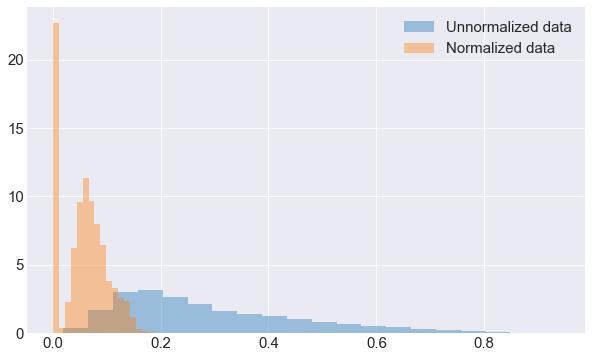

In [38]:
plt.figure(figsize=(10, 6))

plt.hist(
    cost_matrix.flatten(), density=True, alpha=0.4,
    bins=20, label='Unnormalized data'
)
plt.hist(
    increase_matrix.flatten(), density=True, alpha=0.4,
    bins=20, label='Normalized data'
)

plt.legend()
plt.show()

In [18]:
lex_assignments = np.loadtxt('leximin_assignments.txt', delimiter=',').astype(int)
lex_assignments

array([2, 0, 3, ..., 3, 3, 1])

In [19]:
np.unique(lex_assignments, return_counts=True)

(array([0, 1, 2, 3]), array([4441, 2451,  846, 6202]))

In [28]:
lex_assigner = leximin_assignment.LeximinAssignmentHelperV4(
    increase_matrix, capacities
)

cost = lex_assigner.get_cost(
    lex_assignments, cost_matrix=cost_matrix
)
cost_increases = lex_assigner.get_cost_increases(
    lex_assignments, increase_matrix=increase_matrix
)
cost, cost_increases.sum()

(3692.0812325189754, 393.6969301)

In [22]:
np.count_nonzero(cost_increases == 0)

6206

In [29]:
eff_assigner = assignment.AssignmentHelperV2(
    increase_matrix, capacities)
eff_assignments = eff_assigner.ip_solve()
eff_cost = eff_assigner.get_cost(
    eff_assignments, cost_matrix=cost_matrix)
eff_cost_increases = eff_assigner.get_cost_increases(
    eff_assignments, increase_matrix=increase_matrix)

eff_cost, eff_cost_increases.sum()

(3682.0213060559813, 383.637003637)

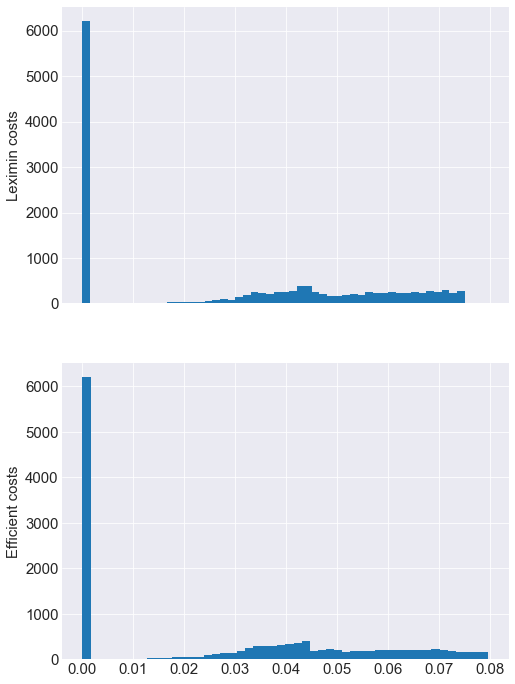

In [25]:
f, ax = plt.subplots(2, 1, figsize=(8, 12), sharex=True, sharey=True)

ax[0].hist(cost_increases, bins=50)
ax[0].set_ylabel('Leximin costs')

ax[1].hist(eff_cost_increases, bins=50)
ax[1].set_ylabel('Efficient costs')

plt.show()

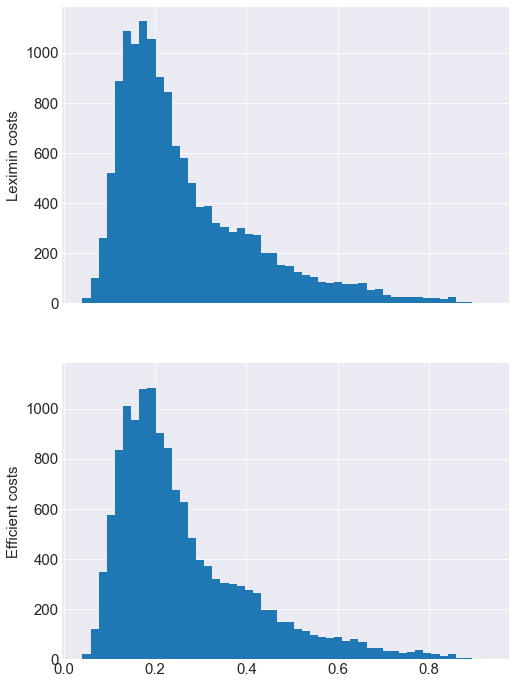

In [39]:
costs = lex_assigner.get_cost_increases(
    lex_assignments, increase_matrix=cost_matrix
)
eff_costs = eff_assigner.get_cost_increases(
    eff_assignments, increase_matrix=cost_matrix
)

f, ax = plt.subplots(2, 1, figsize=(8, 12), sharex=True, sharey=True)

ax[0].hist(costs, bins=50)
ax[0].set_ylabel('Leximin costs')

ax[1].hist(eff_costs, bins=50)
ax[1].set_ylabel('Efficient costs')

plt.show()

In [32]:
print('Price of fairness:')
print(cost / eff_cost)
print(cost_increases.sum() / eff_cost_increases.sum())

Price of fairness:
1.0027321749731453
1.0262225133853844


In [33]:
eff_cost_increases.max()

0.079678742

In [34]:
cost_increases.max()

0.07503518099999998

# The original assignment

In [7]:
df['Reentered'].sum()

3987

In [13]:
running_prob_sum = 0

assignment_dict = {
    1: 'ES',
    3: 'TH',
    4: 'RRH',
    5: 'PREV'
}

for agent_id in range(df.shape[0]):
    running_prob_sum += df.iloc[agent_id][assignment_dict[df.iloc[agent_id]['Real']]]
    
running_prob_sum

3998.076660176001

In [10]:
df.iloc[0]

HouseholdID    2.000011e+08
Real           1.000000e+00
Reentered      1.000000e+00
ES             7.812175e-01
TH             7.648203e-01
RRH            7.547055e-01
PREV           7.042891e-01
Name: 6, dtype: float64

In [15]:
running_prob_increase = 0

for agent_id in range(df.shape[0]):
    running_prob_increase += increase_from_best_df.iloc[agent_id][assignment_dict[df.iloc[agent_id]['Real']]]
    
running_prob_increase

699.6923577569993

In [16]:
running_bottleneck = 0

for agent_id in range(df.shape[0]):
    temp_prob = increase_from_best_df.iloc[agent_id][assignment_dict[df.iloc[agent_id]['Real']]]
    
    if running_bottleneck < temp_prob:
        running_bottleneck = temp_prob
        
running_bottleneck

0.22075990099999998